<a href="https://colab.research.google.com/github/mbk-dev/publications_RUS/blob/main/main/08%20gold_vs_stocks.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

In [ ]:
!pip install okama

In [3]:
import matplotlib. pyplot as plt
plt.rcParams['figure.figsize'] = [12.0, 6.0]

import okama as ok

## Расчеты для статьи "Золото и серебро на фоне биржевых кризисов"

Статья доступна на [сайте RostSber.ru]().

In [4]:
ls = ['GC.COMM', 'DJI.INDX']  # индекс Доу c 1979 года
x = ok.AssetList(ls, inflation=False)
x

assets           [GC.COMM, DJI.INDX]
currency                         USD
first_date                   1979-01
last_date                    2021-09
period_length     42 years, 9 months
inflation                       None
dtype: object

### Среднегодовая доходность акций США и золота

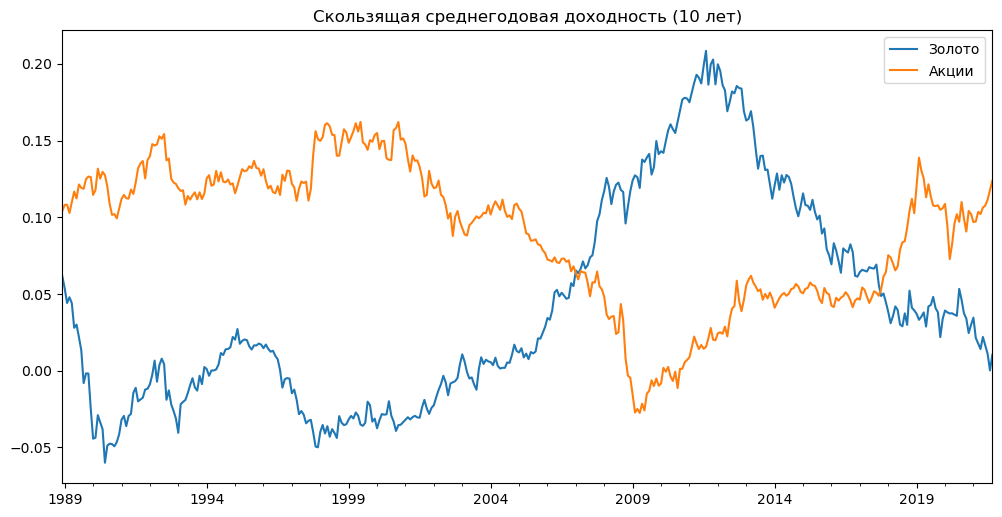

In [8]:
x.get_rolling_cagr(window=12 * 10).plot()
plt.legend(['Золото', 'Акции'])
plt.title('Скользящая среднегодовая доходность (10 лет)');

### Корреляция между золотом и акциями США

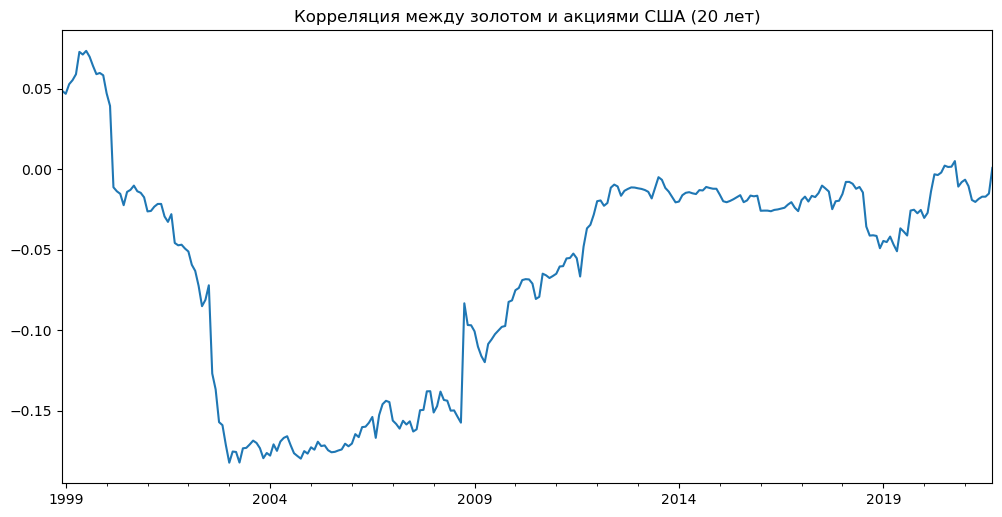

In [7]:
x.index_rolling_corr(window=12*20).plot(legend=False)
plt.title('Корреляция между золотом и акциями США (20 лет)');

### Корреляция между золотом и российскими акциями

In [9]:
y = ok.AssetList(['IMOEX.INDX', 'GC.COMM'], ccy='RUB', inflation=False)

In [10]:
y

assets           [IMOEX.INDX, GC.COMM]
currency                           RUB
first_date                     1997-10
last_date                      2021-09
period_length       24 years, 0 months
inflation                         None
dtype: object

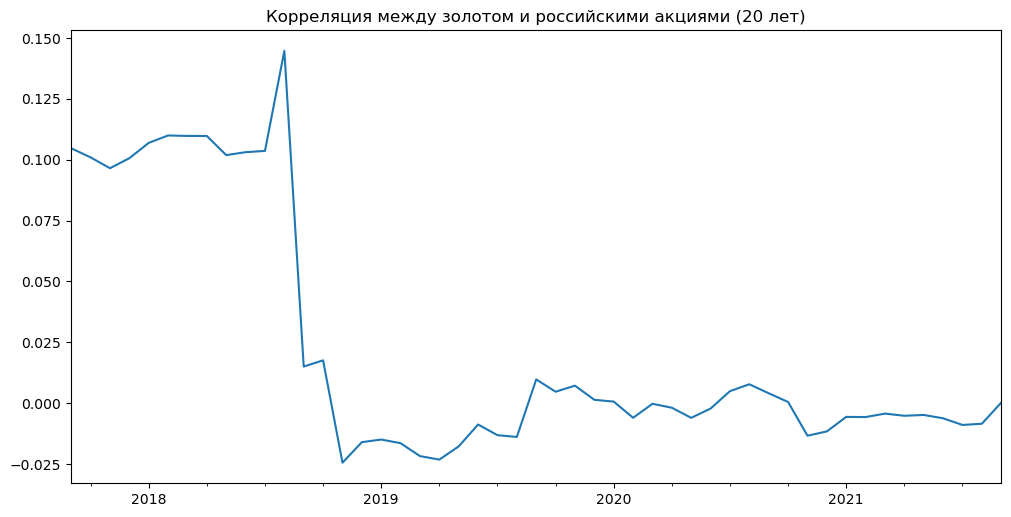

In [13]:
y.index_rolling_corr(window=12*20).plot(legend=False)
plt.title('Корреляция между золотом и российскими акциями (20 лет)');